<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Regression/Multiple_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



## Linear Regression<br>
y = W.X+ b<br>

W = Weights<br>
X = Features<br>
b = bais<br>

## Muliple Linear Regression<br>
y = W<sub>1</sub>*X<sub>1</sub> + W<sub>2</sub>*X<sub>2</sub> + .... + W<sub>n</sub>*X<sub>n</sub>

## Generate the data

In [87]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=1000, n_features=2, n_informative=2, noise=10.0, bias=1.0, coef=True,random_state=42)

In [88]:
# yhat = '(w1*x1)+(w2*x2)+bias'
df = pd.DataFrame(data={'feature1':X[:,0], 'feature2':X[:,1], 'target (y)':y, 'weight1':coef[0],'weight2':coef[1],'bias':1 , 'y_hat': ((coef[0]*X[:,0])+(coef[1]*X[:,1]))+1 })
df.head()

,feature1,feature2,target (y),weight1,weight2,bias,y_hat
0,-0.167118,0.146714,-13.996950,40.710649,6.600984,1,-4.835031
1,-0.020902,0.117327,-11.678089,40.710649,6.600984,1,0.923559
2,0.150419,0.364961,18.775455,40.710649,6.600984,1,9.532753
3,0.555604,0.089581,7.661465,40.710649,6.600984,1,24.210339
4,0.058209,-1.142970,-13.195530,40.710649,6.600984,1,-4.175014


## Visualize the data

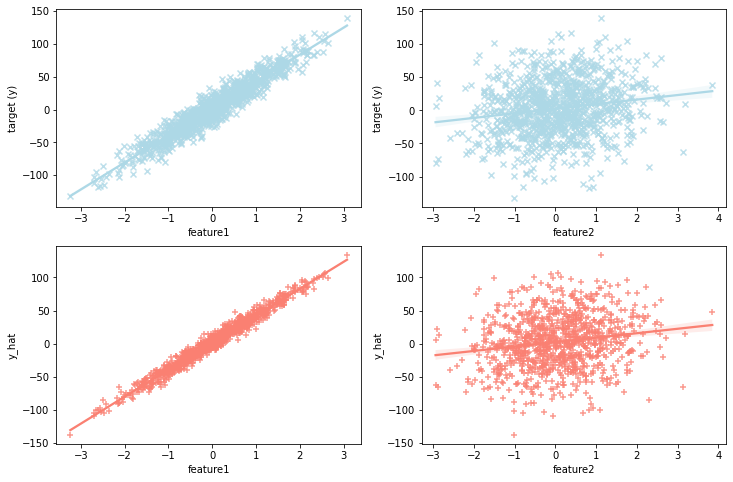

In [89]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.regplot(x='feature1',y='target (y)', data=df , marker='x', color='lightblue')
plt.subplot(2,2,2)
sns.regplot(x='feature2',y='target (y)', data=df , marker='x', color='lightblue')
plt.subplot(2,2,3)
sns.regplot(x='feature1',y='y_hat', data=df , marker='+', color='salmon')
plt.subplot(2,2,4)
sns.regplot(x='feature2',y='y_hat', data=df , marker='+', color='salmon')


plt.show()

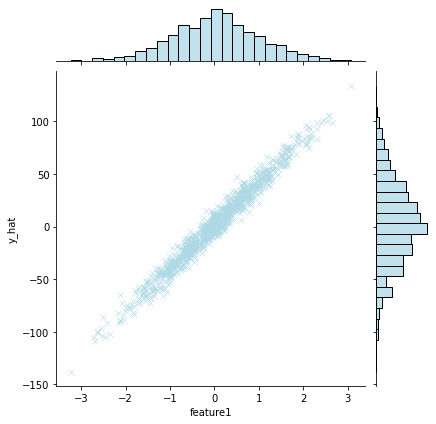

In [90]:

sns.jointplot(x='feature1',y='y_hat', data=df , marker='x', color='lightblue');


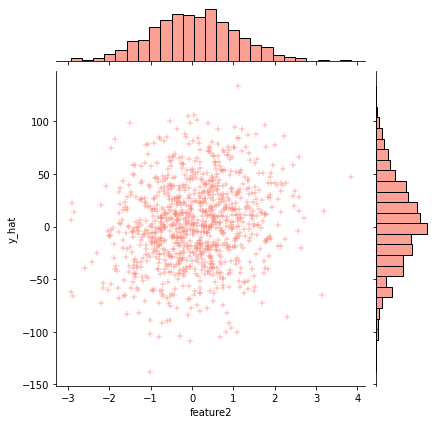

In [91]:

sns.jointplot(x='feature2',y='y_hat', data=df , marker='+', color='salmon');

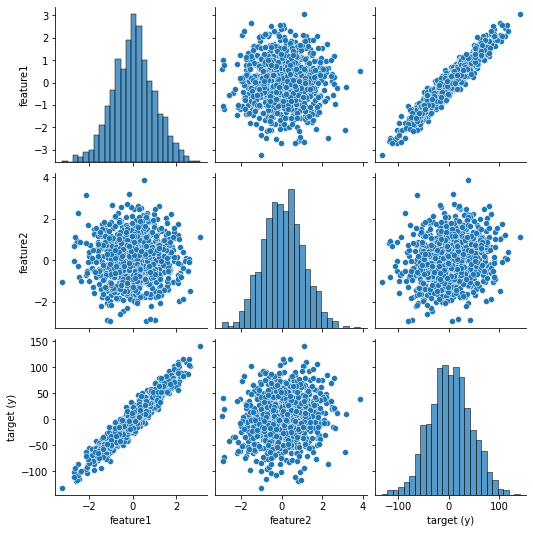

In [92]:
sns.pairplot(df[['feature1','feature2','target (y)']]);

## Features and Target

In [93]:
X = df[['feature1','feature2']]
y = df['target (y)']

print('Shape of Independent variable',X.shape)
print('Shape of Dependent variable',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('Shape of Training data X',X_train.shape)
print('Shape of Training data y',y_train.shape)
print('Shape of Testing data X',X_test.shape)
print('Shape of Testing data y',y_test.shape)

Shape of Independent variable (1000, 2)
Shape of Dependent variable (1000,)
Shape of Training data X (750, 2)
Shape of Training data y (750,)
Shape of Testing data X (250, 2)
Shape of Testing data y (250,)


## Weigth matrix and Bias

In [94]:
def get_weight_and_bias(num_w, num_b):
  Weights = np.random.rand(num_w)
  Bias = 0.01*np.random.rand(num_b)
  return Weights,Bias

In [103]:
# An example 
W,b = get_weight_and_bias(2,1)
print('Shape Multiple regression output ',((X_train@W)+b).shape)
print('Shape target output ',y_train.shape)

Shape Multiple regression output  (750,)
Shape target output  (750,)


## Muliple Linear Regression From Scratch

**Muliple Linear Regression**<br>
y = W<sub>1</sub>*X<sub>1</sub> + W<sub>2</sub>*X<sub>2</sub> + .... + W<sub>n</sub>*X<sub>n</sub>

In [96]:
def multiple_regression(features, weights, bias):
  y_hat = (features@weights)+bias
  return y_hat

## Loss function
Mean squared error = mean of (y_true - y_preds)**2

In [97]:
def loss_fn(ground_truth, predictions):
  return np.mean(np.square((ground_truth-predictions)))
  # return (1/len(ground_truth))*np.sum((ground_truth - predictions)**2)

## Gradient Descent 
Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.

We use mean squared error as the Loss function <br>
1/N * (y_true - y_pred)**2

Where y_pred = y = W<sub>1</sub>*X<sub>1</sub> + W<sub>2</sub>*X<sub>2</sub> + .... + W<sub>n</sub>*X<sub>n</sub> (Multiple regression)

**error = y_true - ( W<sub>1</sub>*X<sub>1</sub> + W<sub>2</sub>*X<sub>2</sub> + .... + W<sub>n</sub>*X<sub>n</sub> )**

derivative loss with respect to Weights <br>
 -2/N * (error) * X<sub>i</sub>

derivative with respect to bias <br>
 -2/N * (error) * 1

We want to move in the negative direction of the gradient

### Updating weights and bias

W<sup>k+1</sup> = W<sup>k</sup> + (Learning_rate * -Gradient)

B<sup>k+1</sup> = B<sup>k</sup> + (Learning_rate * -Gradient)





In [126]:
def gradient_descent(features, ground_truth, predictions):
  # difference btw true-values and predicted-values is the error
  error = ground_truth-predictions
  
  # derivative of loss wrt weights
  dW=[]
  for col in features.columns:
    dW.append(-2*np.mean((error*features[col])))

  # derivative of loss wrt bias
  db = -2*np.mean(error)
  
  return dW,db

## Training a Multiple Regression Model 

In [123]:
def model_training(epochs,W,b,learning_rate=1e-3):

  for i in range(epochs):
    # get predictions
    y_hat = multiple_regression(X_train, weights=W, bias=b)
    # compute loss
    loss = loss_fn(y_train, y_hat)

    # optimize the model parameters 
    [dW1, dw2], db = gradient_descent(X_train, y_train, y_hat)
    # update the weights
    W[0] = W[0] + (learning_rate*-dW1)
    W[1] = W[1] + (learning_rate*-dW1)
    b = b + (learning_rate*-db)
    
    # print the loss

    print('epoch:',i,' loss:',loss)

In [124]:
# Training
w,b = get_weight_and_bias(2,1)
model_training(10,w,b)

epoch: 0  loss: 1716.7429173639375
epoch: 1  loss: 1709.8577534004535
epoch: 2  loss: 1703.0088471460526
epoch: 3  loss: 1696.1960420737282
epoch: 4  loss: 1689.4191822871337
epoch: 5  loss: 1682.6781125181205
epoch: 6  loss: 1675.9726781242962
epoch: 7  loss: 1669.3027250865284
epoch: 8  loss: 1662.6681000065469
epoch: 9  loss: 1656.0686501044893


## Complete Multiple Regression model from scratch

In [127]:
class Multiple_reg:
  def __init__(self, learning_rate=1e-3, num_weights=2 , bias=0.001*np.random.rand()):
    self.learning_rate = learning_rate
    self.weight = np.random.rand(num_weights)
    self.bias = bias
  
  def multiple_regression(self, features):
    return (features@self.weight)+self.bias

  def loss_fn(self, ground_truth, predictions):
    return np.mean(np.square((ground_truth-predictions)))

  def gradient_descent(self, features, ground_truth, predictions):
    error = ground_truth - predictions
    dW =[]
    for col in features.columns:
      dW.append(-2*np.mean((error*features[col])))
    db = -2*np.mean(error)
    return dW,db
  
  def optimize_model_parametes(self, features, ground_truth, predictions):
    dW, db = self.gradient_descent(features, ground_truth, predictions)
    self.weight[0] += self.learning_rate * -dW[0]
    self.weight[1] += self.learning_rate * -dW[1]
    self.bias += self.learning_rate * -db

  def fit(self, X, y_true, epochs=10, to_print=False):    
    history={'epoch':[],'loss':[]}
    for epoch in range(epochs):
      y_hat = self.multiple_regression(X)
      loss = self.loss_fn(y_true, y_hat)
      self.optimize_model_parametes(X, y_true, y_hat)
      if to_print:
        print('epoch:',epoch,'loss:',loss)
      history['epoch'].append(epoch)
      history['loss'].append(loss)
    return history
    
  def predict(self ,test_features):
    y_hat = self.multiple_regression(test_features)
    return y_hat
      
  def get_model_coef(self):
    return self.weight, self.bias

  def evaluate(self,test_features,y_test):
    y_hat = self.predict(test_features)
    loss = self.loss_fn(y_test,y_hat)
    return loss

    

## Model training 

In [129]:
model1 = Multiple_reg()

history1 = model1.fit(X_train, y_train, epochs=1000)

## Learning Curve

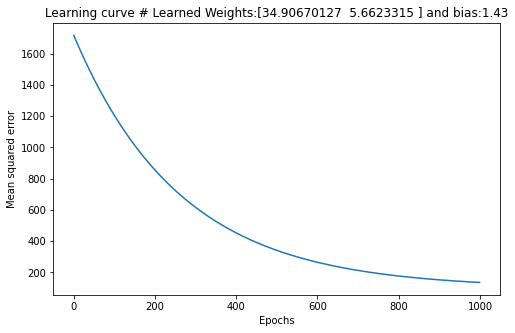

In [140]:
# helper function
def plot_learning_curve(model,history):
  model_coef,bias = model.get_model_coef()
  plt.figure(figsize=(8,5))
  plt.plot(history['loss']);
  plt.title(f'Learning curve # Learned Weights:{model_coef} and bias:{bias :.2f}')
  plt.xlabel('Epochs')
  plt.ylabel('Mean squared error')
  plt.show()

plot_learning_curve(model1,history1)

## Compare Our Model with Sklearn Model

In [143]:
# helper function
def print_model_coef(model):
  model_coef,bias = model.get_model_coef()
  print(f'Actual Weight:{coef} and bias:{df["bias"][0]}')
  print(f'Learned Weight:{model_coef} and bias:{bias :.2f}')

print_model_coef(model1)

# Lets use sklearn Linear model and check the coef
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
print('Sklearn LinearModel coef  Weight:',sklearn_model.coef_,'bias:',sklearn_model.intercept_)

Actual Weight:[40.71064891  6.60098441] and bias:1
Learned Weight:[34.90670127  5.6623315 ] and bias:1.43
Sklearn LinearModel coef  Weight: [41.03154669  6.6958103 ] bias: 1.0619463287706128


In [172]:
# make predictions
predictions = model1.predict(X_test)

## Plot predictions

In [168]:
# utility functions for plotting predictions
def get_axis(x_axis,y_axis,model):
  # datapoints
  X = np.linspace(x_axis.min(), x_axis.max())
  Y = np.linspace(y_axis.min(), y_axis.max())
  # create a mesh grid
  XX, YY = np.meshgrid(X, Y)
  # z-axis
  z = model.predict(pd.DataFrame({'f1':np.ravel(XX),'f2':np.ravel(YY)}))
  ZZ = np.reshape(z.values, XX.shape)
  return XX,YY,ZZ

In [169]:
X, Y, Z = get_axis(X_test['feature1'],X_test['feature2'], model1)

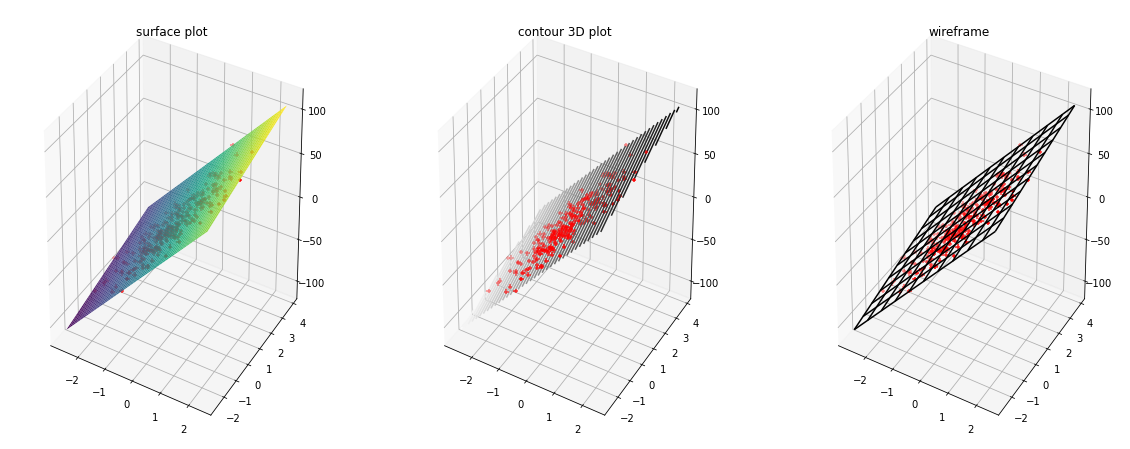

In [182]:
fig = plt.figure(figsize=(20,8))

ax = plt.subplot(1,3,1,projection='3d')
ax.scatter3D(X_test['feature1'], X_test['feature2'], predictions, marker='+', color='red' )
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('surface plot');


ax = plt.subplot(1,3,2,projection='3d')
ax.scatter3D(X_test['feature1'], X_test['feature2'], predictions, marker='+', color='red' )
ax.contour3D(X, Y, Z, 50, cmap='binary');
ax.set_title('contour 3D plot');



ax = plt.subplot(1,3,3,projection='3d')
ax.scatter3D(X_test['feature1'], X_test['feature2'], predictions, marker='+', color='red' )
ax.plot_wireframe(X, Y, Z, rcount=10, ccount=10, color='black')
ax.set_title('wireframe');

In [164]:
z.shape,x.shape

((2500,), (50, 50))

(50, 50)